# MODEL PROJECT

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

import ipywidgets as widgets

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Model description

We consider a two period OLG model where we include an Euler equation. We start of by looking at a model where n = 0 which means that the population is static.

**Firms maximization problem**
$$
\max_{K_t, L_t}  AK_t^{\alpha}L_t^{1-\alpha} - R_tK_t - w_tL_t
$$
$R_t$ is the rental rate on capital. $w_t$ is defined as the wage rate. $L_t$ and $K_t$ is the labor and capital employed by a firm. $A$ is the total factor productivity and must be greater than 0. $\alpha \in (0,1)$ and is the percentage of capital the consumer uses in their production process.

We write up the utility for young individuals. $\newline$
**Saving problem for a individual:**
$$
U_T = \ln(c_{1t}) + \frac{1}{1+\rho} \ln(c_{2t+1})
$$
$c_{1t}$ is consumption when young and $c_{2t+1}$ is consumption when old. We know that $\rho$ should be larger than $-1$. 
$\newline$
Furthermore, we know that for young people their wage is equal to their labor income, but for old people their income is equal to savings and social security benefits. This means that we assume that old people do not work. 

To be able to solve the model we list some budget constraints for our model. $\newline$
**Budget constraints:**
$$
c_{1t} + s_t = w_t (1-\tau)
$$
$$
c_{2t+1} = s_t (1+r_{t+1}) + \tau w_{t+1}
$$

Solving the problem yields the **Euler equation:**
$$
c_{2t+1} = \frac{1+r_{t+1}}{1+\rho}c_{1t}
$$
$\tau$ is defined as the fraction of the contribution from the young people to the old people which is paid out in the same period. It is a fraction of their wages. $\tau$ should be between 0 and 1. 

We would now like to derive the expression for the savings, $s_t$. $\newline$
**Replacing $c_{1t}$ and $c_{2t+1}$ from the budget constraints in the Euler equaiton:**
$$
s_t = \frac{1}{2+\rho} w_t (1-\tau) - \tau \frac{1+\rho}{2+\rho} \frac{1}{1+r_{t+1}} w_{t+1}
$$

We know that $K_{t+1} = S_t \leftrightarrow k_{t+1} = \frac{s_t}{1+n}$ and $n=0$ due to no population growth. Therefore, we can find the following expression for $k_{t+1}$:
$$
k_{t+1} = \frac{1}{2+\rho} w_t (1-\tau) - \tau \frac{1+\rho}{2+\rho} \frac{1}{1+r_{t+1}} w_{t+1}
$$

In order to find the capital accumulation we need de derive the wage rate and the rental rate on capital. $\newline$
**FOCs of the profit function in per capita terms are:**
$$
0 = (1-\alpha) A K_t^\alpha L_{t}^{-\alpha} - w_t \leftrightarrow w_t = (1-\alpha) A K_t^\alpha L_{t}^{-\alpha} \leftrightarrow w_t = (1-\alpha)A(\frac{K_t}{L_t})^\alpha \leftrightarrow \newline w_t = (1-\alpha)Ak_t^\alpha
$$
$$
0 = \alpha A K_{t}^{\alpha-1}L_t^{1-\alpha} -R_{t} \leftrightarrow R_t = \alpha A K_{t}^{\alpha-1}L_t^{1-\alpha} \leftrightarrow R_t = \alpha A (\frac{K_t}{L_t})^{\alpha-1} \leftrightarrow \newline R_t = 1 + r_{t+1} = \alpha A k_t^{\alpha - 1}
$$

By inserting $w_t$, $w_{t+1}$ and $r_{t+1}$ in $k_{t+1}$ we find that the **capital accumulation** is given by: 
$$
k_{t+1} = \frac{1}{2+\rho} (1-\alpha)Ak_t^\alpha (1-\tau) - \tau \frac{1+\rho}{2+\rho} \frac{1-\alpha}{\alpha}k_{t+1}
$$

When in steady state we know that $k_{t+1} = k_t = k^*$. Therefore, we also find that the expression for steady state for capital is: $\newline$
**Steady state:**
$$
k^* = [\frac{1}{1+\frac{1+\rho}{2+\rho} \frac{1-\alpha}{\alpha}\tau} (\frac{1}{2+\rho}(1-\alpha)A(1-\tau))]^\frac{1}{1-\alpha}
$$

## Analytical solution

First step is to solve the model analytically if possible. 

We start of by defining the parameters we use in our function using Sympy. 

Afterwards, we solve for $k^*$ in our capital accumulation function derived above.

Lastly, we turn our function into a python function using Sympy.lambdify.

In [2]:
# Defining parameters as symbols
rho = sm.symbols('rho')
tau = sm.symbols('tau')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
k = sm.symbols('k')

In [3]:
# Solving for steady state using Sympy.solve
steady_state = sm.Eq(k, (1/(2+rho))*(1-alpha)*A*k**alpha*(1-tau)-tau*((1+rho)/(2+rho))*((1-alpha)/alpha)*k)
ks = sm.solve(steady_state, k)[0]
ks

((-alpha*rho**2*tau - 3*alpha*rho*tau - 2*alpha*tau + alpha*(rho + 2)**2 + rho**2*tau + 3*rho*tau + 2*tau)/(A*alpha*(alpha*rho*tau - alpha*rho + 2*alpha*tau - 2*alpha - rho*tau + rho - 2*tau + 2)))**(1/(alpha - 1))

The expression above is the solution for the steady state. If we rearrange the expression we will obtain the following expression for steady state:
$$
k^* = [\frac{1}{1+\frac{1+\rho}{2+\rho} \frac{1-\alpha}{\alpha}\tau} (\frac{1}{2+\rho}(1-\alpha)A(1-\tau))]^\frac{1}{1-\alpha}
$$

In [4]:
# Turning our function into a python function using Sympy.lambdify
ss_func = sm.lambdify((rho,tau,A,alpha),ks)
ss_func(0.2, 0.4, 1, 0.5)

0.012530630429939847

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

We start of by defining the values of the parameters. 

We optimize algorithms using the brentq method. Husk at overvej hvilken metode vi skal anvende og argumenter for, hvorfor vi har valgt netop denne metode. 

In [5]:
# Setting parameters
rho = 0.2
tau = 0.4
A = 1
alpha = 0.5

In [6]:
# Defining the objective
obj = lambda k: k - ((1/(2+rho))*(1-alpha)*A*k**alpha*(1-tau)-tau*((1+rho)/(2+rho))*((1-alpha)/alpha)*k)

# Optimizing the model and finding the roots
result = optimize.root_scalar(obj,bracket=[1e-10,10],method='brentq') 
result.root

0.012530630429939852

From the giving values of the parameters we find that steady state, $k^*$, is equal to 0.03. $\newline$
Since we are using a OLG model we know that convergence is not a problem. 

In [7]:
# The following code is for the start of the simulation of the model. 
from modelproject import modelclass

model = modelclass()

initializing the model:
calling .setup()
calling .allocate()


We tried to simulate the model in our py-file without luck. When running the code 'model.simulate()' we get the error: 
AttributeError: 'modelclass' object has no attribute 'simT'. $\newline$
Therefore, we have not included this since it would give us an error give, when we run the whole notebook. 

# Further analysis

We now wanna expand our model where we look at population growth. This means that n is not equal to 0 anymore.

We try to do a for loop for different values of the fraction that the young contributes to the old through their wages, $\tau$. We then wanna see how the steady state changes.

In [8]:
n = 0.5
taus = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Creating an empty list to store the values of steady state
solution = []

for tau in taus: 
    f_a = lambda k1: (1/(2+rho))*(1-alpha)*A*k1**alpha*(1-tau)-tau*((1+rho)/(2+rho))*((1-alpha)/alpha)*k1
    f_b = lambda k2: (1+n)*f_a(k2)
    f_c = lambda k3: k3 - f_b(k3)
    res1 = optimize.root_scalar(f_c,bracket=[1e-10,10],method='brentq') # i py-filen bruger han bisect?
    solution.append(res1.root)
    print(res1.root)


0.08043658639893675
0.05493164062500001
0.03671279769833235
0.023749765434415468
0.014633194588969821
0.008365556216537775
0.004228758060743761
0.0016981644733021109
0.0003854746306269055


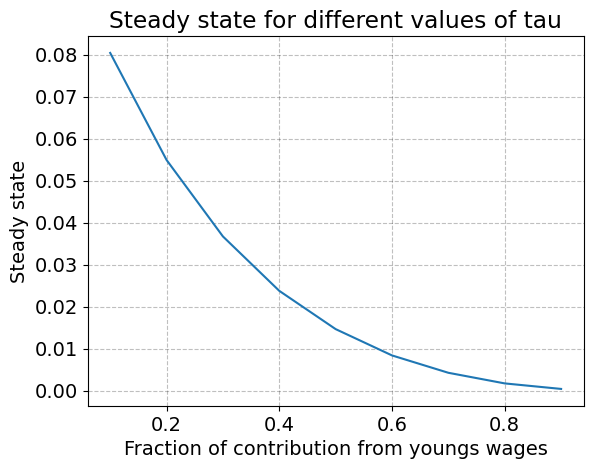

In [9]:
# Creating figure
def plot_tau():
    fig = plt.figure()

    # Creating the plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(taus, solution)

    # Add labels and title
    ax.set_title('Steady state for different values of tau')
    ax.set_xlabel('Fraction of contribution from youngs wages')
    ax.set_ylabel('Steady state')

# Print
plot_tau()

From the plot above we see that as $\tau$ is increasing the steady state for capital is decreasing. 

One explanation for this is that when young poeple have to pay a larger fraction of their wage to the old people in the same period, the young people then have a smaller incentive to work and therefore the overall capital will decrease. 

# Conclusion

From the analysis above we see that, when there is no population growth ($n = 0$), we find steady state to be 0.0125 for $\tau = 0.4$. $\newline$
When we then change the population growth, such that $n = 0.5$ we find that the steady state increases for $\tau = 0.4$, such that steady state now is 0.0237. 

This is in accordance to what we expect since when the population is growing, there will be more young people to work and therefore, the steady state value for capital will increase as well. 